# Analysis of changes in nightly lows at DCA Reagan National Airport over last 60 years¶

Everyone is aware of global worming caused by the increased CO2 content and CH4 content in our atmosphere, the former being caused by the combustion of fossile fuels and the latter being caused by thawing of tundra and gas flares.  It is also well known that the international community strives to limit global warming by about 1.5 fahrenheit degrees.  Nevertheless, authorities say we may have reached this 1.5 fahrenheit degree increase.  

This project looks at the change in nightly lows in the last 60 years in Washington DC to see how it has changed as compared to the global increase of 1.5 fahrenheit degrees.  Is the change in nightly lows greater?  Why?  Can this be all attributed to global warming?  Or are other factors at play here such as the urban heat island effect?  

Of particular note, after living in Washington DC for some time, I notice that on the local news, the record lows are in the negative double digits in Fahrenheit.  But it has almost never gotten below 10F sinche I have been here, which is 25 years.  Why?  Can I show this on a graph?  Why is this so?  Certainly a global warming of 1.5 Fahrenheit degrees could not solely be the cause of never getting within 20 Fahrenheit degrees of our past record lows.  

This project will explore these issues.  
   
The data was imported from the National Centers for Environmental Information of NOAA (i.e. the National Weather Service)

## After downloading data to my local PC, I now read it in and inspect it. Notice that only the date and the minimum temperatures in Fahrenheit are read in

In [29]:
import pandas as pd
# Program to extract number
# of rows using Python
#import xlrd
 
# Give the location of the file
#loc = ("C:\Users\user\Downloads\rocmintemp1a.csv")
df = pd.read_csv("C:\\Users\\Matthew\\Desktop\\datasets\\reagan1a.csv")
print(df.head())
print('ldlsl')

       STATION      DATE   MAX   MIN   SNDP
0  72405013743  01/01/60  44.4  28.4  999.9
1  72405013743  01/02/60  39.4  28.4  999.9
2  72405013743  01/03/60  53.4  37.4  999.9
3  72405013743  01/04/60  44.4  34.3  999.9
4  72405013743  01/05/60  43.3  35.4  999.9
ldlsl


### I now explore the read in data# 

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21023 entries, 0 to 21022
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  21023 non-null  int64  
 1   DATE     21023 non-null  object 
 2   MAX      21023 non-null  float64
 3   MIN      21023 non-null  float64
 4   SNDP     21023 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 821.3+ KB
None


### do note that the date column is object type. This will have to be converted to datetime

In [31]:
print(df.shape)

(21023, 5)


In [32]:
print(df.describe())

            STATION           MAX           MIN          SNDP
count  2.102300e+04  21023.000000  21023.000000  21023.000000
mean   7.240501e+10     69.103458     49.516306    965.005061
std    0.000000e+00     17.700534     70.647539    183.208539
min    7.240501e+10      8.100000     -5.100000      0.400000
25%    7.240501e+10     55.000000     35.100000    999.900000
50%    7.240501e+10     71.100000     48.900000    999.900000
75%    7.240501e+10     84.400000     64.000000    999.900000
max    7.240501e+10    105.100000   9999.900000    999.900000


### do note the min temp of 9999.000. This row will have to be removed in a cleaning step

In [33]:
print(df['MIN'].value_counts())

68.0    384
72.0    365
32.0    358
34.0    348
70.0    347
       ... 
66.6      1
71.8      1
74.7      1
74.1      1
12.2      1
Name: MIN, Length: 354, dtype: int64


In [34]:
df2 = df[df['MIN'] < 100.0]
print(df2.shape)

(21022, 5)


## only one row was eliminated in this cleaning step

In [35]:
print(df2)

           STATION      DATE   MAX   MIN   SNDP
0      72405013743  01/01/60  44.4  28.4  999.9
1      72405013743  01/02/60  39.4  28.4  999.9
2      72405013743  01/03/60  53.4  37.4  999.9
3      72405013743  01/04/60  44.4  34.3  999.9
4      72405013743  01/05/60  43.3  35.4  999.9
...            ...       ...   ...   ...    ...
21018  72405013743  12/27/21  62.1  39.9  999.9
21019  72405013743  12/28/21  57.9  39.0  999.9
21020  72405013743  12/29/21  57.9  39.9  999.9
21021  72405013743  12/30/21  55.0  46.9  999.9
21022  72405013743  12/31/21  59.0  46.9  999.9

[21022 rows x 5 columns]


In [36]:
df2 = df2[df2['MIN'] > -43.0]
print(df2.shape)

(21022, 5)


In [37]:
df2['DATE'] = pd.to_datetime(df['DATE'])

print(df2.shape)
print(df2.head(90))

(21022, 5)
        STATION       DATE   MAX   MIN   SNDP
0   72405013743 2060-01-01  44.4  28.4  999.9
1   72405013743 2060-01-02  39.4  28.4  999.9
2   72405013743 2060-01-03  53.4  37.4  999.9
3   72405013743 2060-01-04  44.4  34.3  999.9
4   72405013743 2060-01-05  43.3  35.4  999.9
..          ...        ...   ...   ...    ...
85  72405013743 2060-03-26  51.3  32.4  999.9
86  72405013743 2060-03-27  66.4  31.3  999.9
87  72405013743 2060-03-28  80.2  52.3  999.9
88  72405013743 2060-03-29  74.3  52.3  999.9
89  72405013743 2060-03-30  69.3  59.4  999.9

[90 rows x 5 columns]


### Unfortunately, dates in the 1960's are automatically converted to 2060's by pandas to_datetime function. The code below corrects this

In [38]:
date_separator = pd.to_datetime("20250101")
century = pd.DateOffset(years=100)
before_separator = df2['DATE'] > date_separator
df2.loc[before_separator , 'DATE'] = df2['DATE'] - century
print(df2.tail())

           STATION       DATE   MAX   MIN   SNDP
21018  72405013743 2021-12-27  62.1  39.9  999.9
21019  72405013743 2021-12-28  57.9  39.0  999.9
21020  72405013743 2021-12-29  57.9  39.9  999.9
21021  72405013743 2021-12-30  55.0  46.9  999.9
21022  72405013743 2021-12-31  59.0  46.9  999.9


In [39]:
df2['year'] = df2['DATE'].dt.year
df2['month'] = df2['DATE'].dt.month
print(df2.head())
print(df2.tail())

       STATION       DATE   MAX   MIN   SNDP  year  month
0  72405013743 1960-01-01  44.4  28.4  999.9  1960      1
1  72405013743 1960-01-02  39.4  28.4  999.9  1960      1
2  72405013743 1960-01-03  53.4  37.4  999.9  1960      1
3  72405013743 1960-01-04  44.4  34.3  999.9  1960      1
4  72405013743 1960-01-05  43.3  35.4  999.9  1960      1
           STATION       DATE   MAX   MIN   SNDP  year  month
21018  72405013743 2021-12-27  62.1  39.9  999.9  2021     12
21019  72405013743 2021-12-28  57.9  39.0  999.9  2021     12
21020  72405013743 2021-12-29  57.9  39.9  999.9  2021     12
21021  72405013743 2021-12-30  55.0  46.9  999.9  2021     12
21022  72405013743 2021-12-31  59.0  46.9  999.9  2021     12


## lets focus on the coldest months of the year for df3, that being Dec thru March

In [40]:
df3 = df2[(df2['month'] == 12) | (df2['month'] < 4)]
print(df3.shape)

(6985, 7)


### Unfortunately, December is of a different year than Jan thru March. I'll remedy this issue by adding a new column called 'season' to allow for December to be grouped with Jan thru March of the next calendar year

In [41]:
df3['season'] = df3.apply(lambda x: f"{x['year']-1}/{x['year']}" if x['month'] <= 3 else f"{x['year']}/{x['year']+1}", axis=1)
print(df3.head())
print(df3.tail())

       STATION       DATE   MAX   MIN   SNDP  year  month     season
0  72405013743 1960-01-01  44.4  28.4  999.9  1960      1  1959/1960
1  72405013743 1960-01-02  39.4  28.4  999.9  1960      1  1959/1960
2  72405013743 1960-01-03  53.4  37.4  999.9  1960      1  1959/1960
3  72405013743 1960-01-04  44.4  34.3  999.9  1960      1  1959/1960
4  72405013743 1960-01-05  43.3  35.4  999.9  1960      1  1959/1960
           STATION       DATE   MAX   MIN   SNDP  year  month     season
21018  72405013743 2021-12-27  62.1  39.9  999.9  2021     12  2021/2022
21019  72405013743 2021-12-28  57.9  39.0  999.9  2021     12  2021/2022
21020  72405013743 2021-12-29  57.9  39.9  999.9  2021     12  2021/2022
21021  72405013743 2021-12-30  55.0  46.9  999.9  2021     12  2021/2022
21022  72405013743 2021-12-31  59.0  46.9  999.9  2021     12  2021/2022


C:\Users\Matthew\AppData\Local\Temp/ipykernel_11992/956247562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['season'] = df3.apply(lambda x: f"{x['year']-1}/{x['year']}" if x['month'] <= 3 else f"{x['year']}/{x['year']+1}", axis=1)


In [42]:
meeny = df3.groupby(['season'])['MIN'].mean()

### we will now calculate the average low temperature in Fahrenheit for each winter season of Dec 1 to March 31 for each year 1960 to 2021

In [43]:
print(meeny)

season
1959/1960    32.059341
1960/1961    31.197521
1961/1962    32.337190
1962/1963    29.527273
1963/1964    32.724590
1964/1965    32.616529
1965/1966    34.420000
1966/1967    34.553571
1967/1968    33.627711
1968/1969    32.641975
1972/1973    34.700000
1973/1974    34.019008
1974/1975    32.766116
1975/1976    32.405785
1976/1977    27.245455
1977/1978    27.673554
1978/1979    29.538017
1979/1980    31.732787
1980/1981    30.874380
1981/1982    28.356198
1982/1983    33.428926
1983/1984    29.482787
1984/1985    31.132231
1985/1986    29.024793
1986/1987    30.136364
1987/1988    29.795082
1988/1989    30.742975
1989/1990    31.295868
1990/1991    33.113223
1991/1992    31.614754
1992/1993    30.095041
1993/1994    27.407438
1994/1995    32.006612
1995/1996    27.830328
1996/1997    35.058678
1997/1998    35.361157
1998/1999    33.922314
1999/2000    32.886885
2000/2001    28.544628
2001/2002    33.959504
2002/2003    28.538017
2003/2004    29.536885
2004/2005    30.141322
2005

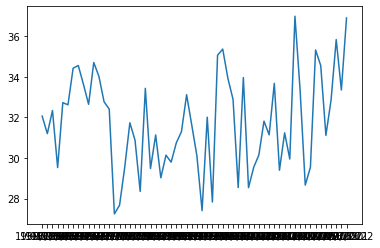

In [44]:
import matplotlib.pyplot as plt
plt.plot(meeny)
plt.show()

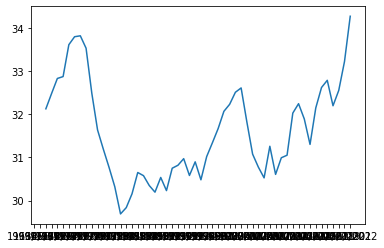

In [45]:
import matplotlib.pyplot as plt
plt.plot(meeny.rolling(7).mean())
plt.show()

## Aside from the epic winters of the late 1970's, it seems that the average nightly winter low has steadily increased since the 1970s. This is best shown in the lower graph which is a rolling average of 7 years past.   Moreover,  in the last few years of 2017 to 2021, low temps have increased dramatically as compared to the 1.5 Fahrenheit increase in global temperatures.

## Now, I will focus on the number of nightly lows each season that dropped below a certain threshold. I played around and it seamed that a threshold of 20F gave significant data

In [46]:
zippo = df3.groupby('season')['MIN'].apply(lambda x: x[x < 20.0].count())
print(zippo)

season
1959/1960     4
1960/1961    22
1961/1962     9
1962/1963    24
1963/1964    10
1964/1965    13
1965/1966     5
1966/1967     5
1967/1968     7
1968/1969     4
1972/1973    12
1973/1974     2
1974/1975     7
1975/1976    16
1976/1977    43
1977/1978    34
1978/1979    22
1979/1980    13
1980/1981    27
1981/1982    21
1982/1983    10
1983/1984    18
1984/1985    19
1985/1986    25
1986/1987     8
1987/1988    22
1988/1989    12
1989/1990    19
1990/1991    10
1991/1992    10
1992/1993    14
1993/1994    26
1994/1995    13
1995/1996    28
1996/1997     6
1997/1998     2
1998/1999     8
1999/2000    10
2000/2001    14
2001/2002     4
2002/2003    23
2003/2004    23
2004/2005    19
2005/2006     4
2006/2007    24
2007/2008     3
2008/2009    17
2009/2010    15
2010/2011     6
2011/2012     2
2012/2013     7
2013/2014    21
2014/2015    23
2015/2016    14
2016/2017     6
2017/2018    19
2018/2019     8
2019/2020     0
2020/2021     0
2021/2022     0
Name: MIN, dtype: int64


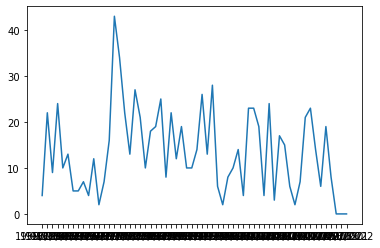

In [47]:
import matplotlib.pyplot as plt
plt.plot(zippo)
plt.show()

## data and graph above show a dramatic grop in occurrences of nightly lows falling below the threshold of 20F at DCA airport. Note that the last several winter seasons had no nights falling below 20F, something not seen previously in the airport's 60 years of weather observations

In [48]:
ziproll = zippo.rolling(10).mean()
print(ziproll)

season
1959/1960     NaN
1960/1961     NaN
1961/1962     NaN
1962/1963     NaN
1963/1964     NaN
1964/1965     NaN
1965/1966     NaN
1966/1967     NaN
1967/1968     NaN
1968/1969    10.3
1972/1973    11.1
1973/1974     9.1
1974/1975     8.9
1975/1976     8.1
1976/1977    11.4
1977/1978    13.5
1978/1979    15.2
1979/1980    16.0
1980/1981    18.0
1981/1982    19.7
1982/1983    19.5
1983/1984    21.1
1984/1985    22.3
1985/1986    23.2
1986/1987    19.7
1987/1988    18.5
1988/1989    17.5
1989/1990    18.1
1990/1991    16.4
1991/1992    15.3
1992/1993    15.7
1993/1994    16.5
1994/1995    15.9
1995/1996    16.2
1996/1997    16.0
1997/1998    14.0
1998/1999    13.6
1999/2000    12.7
2000/2001    13.1
2001/2002    12.5
2002/2003    13.4
2003/2004    13.1
2004/2005    13.7
2005/2006    11.3
2006/2007    13.1
2007/2008    13.2
2008/2009    14.1
2009/2010    14.6
2010/2011    13.8
2011/2012    13.6
2012/2013    12.0
2013/2014    11.8
2014/2015    12.2
2015/2016    13.2
2016/2017    11.4
201

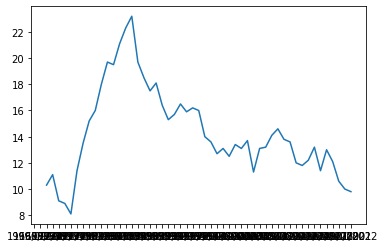

In [49]:
import matplotlib.pyplot as plt
plt.plot(ziproll)
plt.show()

## a rolling feature is applied to the linegraph to average each datapoint according to the previous 10 data points to get a more smooth plot. Notice the huge percentage drop in nightly lows falling below this 20F threshold! I find it hard to believe that this can be statistically explained by just a 1.5 Fahrenheit degrees increase in global temperatures.

In [50]:
df2gb = df2.groupby(['year', 'month'])['MIN'].mean()
print(df2gb)

year  month
1960  1        33.496774
      2        32.789655
      3        29.938710
      4        51.596667
      5        56.632258
                 ...    
2021  8        71.758065
      9        63.696667
      10       57.754839
      11       37.823333
      12       36.893548
Name: MIN, Length: 705, dtype: float64


In [51]:
print(type(df2gb))

<class 'pandas.core.series.Series'>


## now I will calculate the average nightly lows for each year for the coldest month of the year (January) and the warmest month of the year (July) to see how they compare

In [52]:
jandat = df2[df2['month'] == 1]
#print(janmin)
dfjanminmean = jandat.groupby(['year'])['MIN'].mean()
print (dfjanminmean)

year
1960    33.496774
1961    24.948387
1962    29.638710
1963    26.409677
1964    31.809677
1965    28.496774
1966    29.260000
1967    34.833333
1968    25.877273
1969    29.919048
1973    30.370968
1974    34.416129
1975    30.735484
1976    24.303226
1977    16.322581
1978    23.445161
1979    26.464516
1980    29.948387
1981    24.377419
1982    18.000000
1983    29.429032
1984    23.141935
1985    22.203226
1986    26.132258
1987    26.361290
1988    21.545161
1989    29.890323
1990    33.151613
1991    28.632258
1992    28.345161
1993    31.051613
1994    18.916129
1995    31.087097
1996    23.880645
1997    29.829032
1998    35.661290
1999    30.500000
2000    26.990323
2001    26.167742
2002    31.729032
2003    23.903226
2004    21.980645
2005    27.545161
2006    33.354839
2007    31.583871
2008    31.061290
2009    23.503226
2010    26.974194
2011    26.458065
2012    30.912903
2013    31.119355
2014    21.919355
2015    27.035484
2016    25.348387
2017    34.003226
2018 

In [53]:
juldat = df2[df2['month'] == 7]
#print(janmin)
dfjulminmean = juldat.groupby(['year'])['MIN'].mean()
print (dfjulminmean)

year
1960    69.290323
1961    71.496774
1962    67.667742
1963    70.048387
1964    71.067742
1965    69.809677
1966    73.810000
1967    71.020000
1968    73.145455
1969    74.080952
1973    68.190323
1974    67.100000
1975    69.777419
1976    67.703226
1977    69.848387
1978    69.125806
1979    70.000000
1980    72.267742
1981    71.474194
1982    70.451613
1983    70.138710
1984    68.141935
1985    68.319355
1986    70.974194
1987    71.938710
1988    70.006452
1989    69.203226
1990    69.664516
1991    71.322581
1992    70.077419
1993    72.587097
1994    72.051613
1995    71.512903
1996    69.125806
1997    69.709677
1998    68.538710
1999    73.322581
2000    65.951613
2001    65.229032
2002    71.067742
2003    68.925806
2004    70.000000
2005    71.541935
2006    70.719355
2007    68.496774
2008    71.087097
2009    66.870968
2010    72.706452
2011    74.077419
2012    74.280645
2013    73.393548
2014    69.667742
2015    72.535484
2016    73.422581
2017    72.364516
2018 

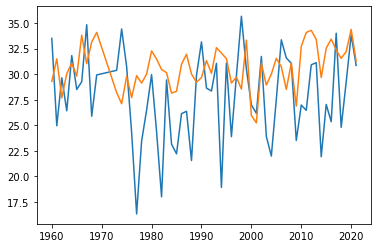

In [54]:
import matplotlib.pyplot as plt
plt.plot(dfjanminmean)
plt.plot(dfjulminmean - 40)
plt.show()

### I will now apply a 7 year rolling average to the above raw data to smooth out the curve

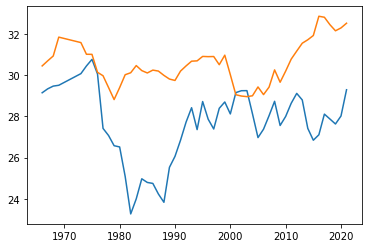

In [55]:
import matplotlib.pyplot as plt
plt.plot(dfjanminmean.rolling(7).mean())
plt.plot((dfjulminmean - 40).rolling(7).mean())
plt.show()

## Average July nightly lows (in yellow) appear to have increased in recent years but the data for January nightly lows seems to be inconclusive.  What I thought would be a significant indication of global warming (i.e. occurrences of extreme cold nights) did not show an outsized indicator of global warming.  Instead, looking at the progression of nightly lows overall and not just focussing on extremely cold nights best exemplifies the effect of global warming in Washington DC.

